In [ ]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

In [ ]:
# parameter for input image
theImage ='/content/drive/MyDrive/08_object_rec/images/giraffe.jpg'
theImage ='/content/drive/MyDrive/08_object_rec/images/aeroplanes.jpg'
theImage ='/content/drive/MyDrive/08_object_rec/images/oranges.jpg'
theImage ='/content/drive/MyDrive/08_object_rec/images/chairs.jpg'
theImage ='/content/drive/MyDrive/08_object_rec/images/knives.jpg'

# parameter for object detection
theConfig  = '/content/drive/MyDrive/08_object_rec/net_models/darknet/yolov3.cfg'
theWeights = '/content/drive/MyDrive/08_object_rec/net_models/darknet/yolov3.weights'
theLabel   = '/content/drive/MyDrive/08_object_rec/net_models/darknet/coco.names'
theConfidence = 0.5   # minimum probability of detection to be an object

In [ ]:
# parameter for drawing on the image
theTextFont = cv2.FONT_HERSHEY_SIMPLEX
theTextScale = 0.75
theTextColor = (255, 0, 255)  # RGB value
theTextThickness = 2  # text line width

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the class labels from disk
classes=[]
with open(theLabel, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')
    #print(classes)
print("[INFO] No. of classes: ", len(classes))    

[INFO] No. of classes:  80


In [ ]:
# load our serialized model from disk
net = cv2.dnn.readNetFromDarknet(theConfig, theWeights)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# Get the names of all the layers in the network
layersNames = net.getLayerNames()

# Get the names of the output layers, i.e. the layers with unconnected outputs
outputLayers = [ layersNames[i[0] - 1] for i in net.getUnconnectedOutLayers() ]

# print('layersNames type:', type(layersNames), 'length:', len(layersNames))
# print(layersNames)
print('-'*60)
print(outputLayers)

------------------------------------------------------------
['yolo_82', 'yolo_94', 'yolo_106']


Image height: 600, width: 1200


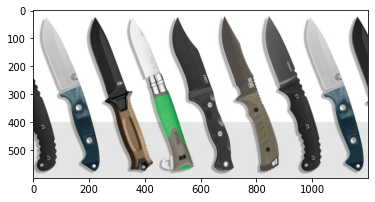

In [ ]:
# load image
image = cv2.imread(theImage) # read as a numpy array, Blue, Green, Red (BGR)
(h, w) = image.shape[:2]
print(f"Image height: {h}, width: {w}")

img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
plt.imshow(img_rgb)  # plot image
plt.show()


In [ ]:
# return a 4D blob from image after mean substraction, normalization and channel swap.
blob = cv2.dnn.blobFromImage(image, 1 / 255, (416,416), [0, 0, 0], 1, crop=False)
net.setInput(blob)
detections = net.forward(outputLayers)

In [ ]:
img_h, img_w = image.shape[:2]
classIds = []
confidences = []
boxes = []
for out in detections:
    for detection in out:  # loop each row of 507 rows
        scores = detection[5:]  # 5 ..85  total 80 elements
        classId    = np.argmax(scores)  # find max. scores inside list, return the position (0-79). scores (80 elements)
        confidence = scores[classId]   ## confidence between 0-1
        if confidence > theConfidence:
            center_x = int(detection[0] * img_w)  # rescale to image original width and height
            center_y = int(detection[1] * img_h)
            width    = int(detection[2] * img_w)
            height   = int(detection[3] * img_h)
            left     = int(center_x - width / 2)
            top      = int(center_y - height / 2)
            classIds.append(classId)   # 0 - 79
            confidences.append(float(confidence))  # 0 - 1
            boxes.append([left, top, width, height])

In [ ]:
print(classIds)

[43, 43, 43, 43, 43, 43, 43, 43]


In [ ]:
print(confidences)

[0.7368859648704529, 0.9834523797035217, 0.9234681725502014, 0.9780569672584534, 0.8822009563446045, 0.820194661617279, 0.862655758857727, 0.9692120552062988]


In [ ]:
print(boxes)

[[993, 68, 200, 478], [28, 23, 164, 533], [1001, 47, 170, 485], [232, 35, 147, 546], [403, 59, 147, 491], [503, 43, 171, 524], [703, 2, 131, 614], [864, 98, 156, 421]]


In [ ]:
# draw on orginal image    
for j in range(0, len(classIds)):    
    box   = boxes[j]
    left  = box[0]
    top   = box[1]
    width = box[2]
    height= box[3]
    right = left + width
    bottom = top + height

    cv2.rectangle(image, (left, top), (right, bottom), (255, 178, 50), 3)
    myLabel = '%.2f' % confidences[j]
    # Get the label for the class name and its confidence
    if classes:
        assert (classIds[j] < len(classes))
        myLabel = '%s:%s' % (classes[classIds[j]], myLabel)
        cv2.putText(image, myLabel, (left, top), theTextFont, theTextScale, theTextColor,theTextThickness) 

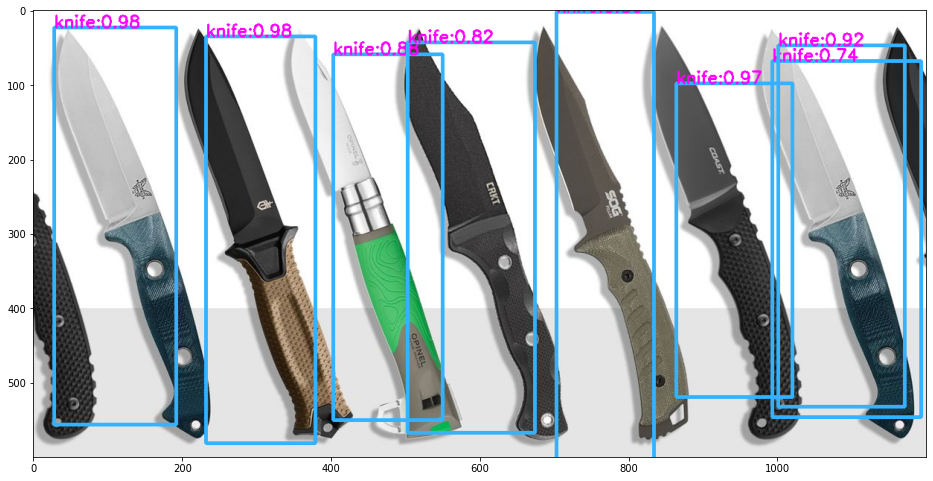

In [ ]:
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
plt.figure(figsize=(16,16))  # make the plot bigger
plt.imshow(img_rgb)  # plot image
plt.show()